## Numpy basics
- Create Numpy array
- Make operations with Numpy array

In [1]:
import csv
import numpy as np
my_list = []
with open('data/demographics.csv', 'r') as f:
    reader = csv.reader(f, delimiter=';')
    my_list = list(reader)
demographics = np.array(my_list)
demographics

array([['Country', 'Region', 'GDP per capita', ..., '2011', '2012', '2013'],
       ['Albania', 'Europe & Central Asia', '1965.70723', ..., '2904780',
        '2900489', '2897366'],
       ['Algeria', 'Middle East & North Africa', '2255.225482', ...,
        '36717132', '37439427', '38186135'],
       ..., 
       ['Vietnam', 'East Asia & Pacific', '757.4009286', ..., '87840000',
        '88772900', '89708900'],
       ['Zambia', 'Sub-Saharan Africa', '443.9206307', ..., '14343526',
        '14786581', '15246086'],
       ['Zimbabwe', 'Sub-Saharan Africa', '347.7456605', ..., '14255592',
        '14565482', '14898092']], 
      dtype='<U30')

In [2]:
countries = demographics[1:,0:1]
years = demographics[0,4:]
# XXX fix the (A, ) array to (A, 1) shape
years = years[:,np.newaxis]
regions = demographics[1:,1]


# Population growth
population_brazil = demographics[19,4:].astype(np.uint32)
population_brazil = population_brazil[:,np.newaxis]
population_usa = demographics[153,4:].astype(np.uint32)
population_usa = population_usa[:,np.newaxis]

# Population/Life expectancy/GDP per capita in countries
life_exp = demographics[1:,3:4].astype(np.float)
population = demographics[1:,-1].astype(np.uint32)
population = population[:,np.newaxis]
gdp_pc = demographics[1:,2:3].astype(np.float)

In [3]:
# show mean Life expectancy among countries (in millions)
np.mean(life_exp)

72.232641509433975

In [4]:
# show standard deviation of life expectancy among all countries (in millions)
np.std(life_exp)

7.8246988772273687

In [5]:
# multiplying np arrays
conversion = np.array([0.000001])
population_brazil_in_millions = population_brazil * conversion
population_usa_in_millions = population_usa * conversion
population_in_millions = population * conversion
population_in_millions = population_in_millions.astype(np.float)
population_usa_in_millions

array([[ 180.671   ],
       [ 183.691   ],
       [ 186.538   ],
       [ 189.242   ],
       [ 191.889   ],
       [ 194.303   ],
       [ 196.56    ],
       [ 198.712   ],
       [ 200.706   ],
       [ 202.677   ],
       [ 205.052   ],
       [ 207.661   ],
       [ 209.896   ],
       [ 211.909   ],
       [ 213.854   ],
       [ 215.973   ],
       [ 218.035   ],
       [ 220.239   ],
       [ 222.585   ],
       [ 225.055   ],
       [ 227.225   ],
       [ 229.466   ],
       [ 231.664   ],
       [ 233.792   ],
       [ 235.825   ],
       [ 237.924   ],
       [ 240.133   ],
       [ 242.289   ],
       [ 244.499   ],
       [ 246.819   ],
       [ 249.623   ],
       [ 252.981   ],
       [ 256.514   ],
       [ 259.919   ],
       [ 263.126   ],
       [ 266.278   ],
       [ 269.394   ],
       [ 272.657   ],
       [ 275.854   ],
       [ 279.04    ],
       [ 282.162411],
       [ 284.968955],
       [ 287.625193],
       [ 290.107933],
       [ 292.805298],
       [ 2

In [6]:
# get countries had more than 200 million people in 2013
np.array([countries[population_in_millions > 200], 
          population_in_millions[population_in_millions > 200]])

array([['Brazil', 'China', 'India', 'Indonesia', 'United States'],
       ['204.259377', '1357.3799999999999', '1279.498874', '251.268276',
        '316.497531']], 
      dtype='<U32')

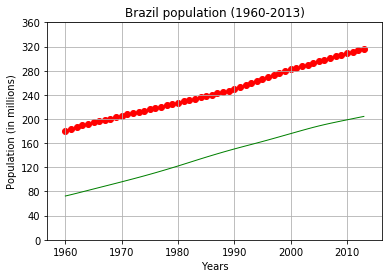

In [7]:
import matplotlib.pyplot as plt
plt.plot(years, population_brazil_in_millions, color='green', linewidth=1)
plt.scatter(years, population_usa_in_millions, color='red', linewidth=1)
plt.ylabel('Population (in millions)')
plt.xlabel('Years')
plt.title('Brazil population ('+years[0][0]+'-'+years[-1][0]+')')
plt.yticks(range(0,400,40))
plt.grid(True)
plt.show()